In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
exp = Experiment(
    api_key="52SXTo5QB2MuGvJRWzgY8PJHx",
    project_name="cancer",
    workspace="s-hossain18",log_code=True
)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/data/notebook_files' and lookings in parents. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/s-hossain18/cancer/2280ac3a3fd44aa7a4b793b62213cfdc



In [42]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
random_state = 42

cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))
print("Shape of cancer data: {}\n".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("\nFeature names:\n{}".format(cancer.feature_names))

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=random_state)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

param_grid = {'C':[0.001,0.01,0.1,1,5,10,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]}

clf = GridSearchCV(logreg,
                    param_grid=param_grid,
                    cv=20,
                    n_jobs=-1)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)



print("\nResults\nConfusion matrix \n {}".format(confusion_matrix(y_test, y_pred)))

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score is {:6.3f}".format(f1))
print("Precision score is {:6.3f}".format(precision))
print("Recall score is {:6.3f}".format(recall))

#these will be logged to your sklearn-demos project on Comet.ml
params={"random_state":random_state,
        "model_type":"logreg",
        "scaler":"standard scaler",
        "param_grid":str(param_grid),
        "stratify":True
}

metrics = {"f1":f1,
"recall":recall,
"precision":precision
}

exp.log_dataset_hash(X_train_scaled)
exp.log_parameters(params)
exp.log_metrics(metrics)

exp.log_confusion_matrix(y_test, y_pred)
exp.end()

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)

Sample counts per class:
{'malignant': 212, 'benign': 357}

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Results
Confusion matrix 
 [[52  1]
 [ 1 89]]
F1 score is  0.989
Precision score is  0.989
Recall score is  0.989


COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/s-hossain18/cancer/8b9253af6b1e491db4cb1ee0356f7d1f
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.9888888888888889
COMET INFO:     precision : 0.9888888888888889
COMET INFO:     recall    : 0.9888888888888889
COMET INFO:   Others:
COMET INFO:     optimizer_count        : 1
COMET INFO:     optimizer_id           : 1968ca002e0b43c6974e7f9b247ccc95
COMET INFO:     optimizer_metric       : loss
COMET INFO:     optimizer_metric_value : 1
COMET INFO:     optimizer_objective    : minimum
COMET INFO:     optimizer_parameters   : {"C": 0.1}
COMET INFO:     optimizer_pid          : 9d01aaa3bd3e6033d67bc72b9474f8513cb54a09
COMET INFO:     optimizer_process

In [48]:
import json, os
# parameters is a dict of hyperparameter names/values
# experiment is a Comet experiment
exp.log_other("optimizer_metric", "accuracy") # name of metric
exp.log_other("optimizer_metric_value", 0.96) 
exp.log_other("optimizer_version", "diy-1.0") # your own info
exp.log_other("optimizer_process", os.getpid()) # if you wish
exp.log_other("optimizer_count", 23) # the combination count so far
#exp.log_other("optimizer_objective", objective) # "minimum" or "maximum"
exp.log_other("optimizer_parameters", json.dumps(params)) # string of parameters

In [11]:
from sklearn.linear_model import LogisticRegression

In [17]:
# file: example-1.py

from comet_ml import Optimizer

# We only need to specify the algorithm and hyperparameters to use:
config = {
    # We pick the Bayes algorithm:
    "algorithm": "bayes",

    # Declare your hyperparameters in the Vizier-inspired format:
    "parameters": {
        "C": {"type": "discrete", "values": [100, 10, 1, 0.1, 0.001]},
    },

    # Declare what we will be optimizing, and how:
    "spec": {
    "metric": "loss",
        "objective": "minimize",
    },
}

# Next, create an optimizer, passing in the config:
# (You can leave out API_KEY if you already set it)
opt = Optimizer(config,api_key="52SXTo5QB2MuGvJRWzgY8PJHx")

# define fit function here!
fit = LogisticRegression()
# Finally, get experiments, and train your models:
for experiment in opt.get_experiments(
        project_name="cancer"):
    # Test the model
    loss = fit(experiment.get_parameter("C"))
    experiment.log_metric("loss", loss)

COMET INFO: COMET_OPTIMIZER_ID=0cc856f89faa491b807200f4530befe4
COMET INFO: Using optimizer config: {'algorithm': 'bayes', 'configSpaceSize': 5, 'endTime': None, 'id': '0cc856f89faa491b807200f4530befe4', 'lastUpdateTime': None, 'maxCombo': 0, 'name': '0cc856f89faa491b807200f4530befe4', 'parameters': {'C': {'type': 'discrete', 'values': [100, 10, 1, 0.1, 0.001]}}, 'predictor': None, 'spec': {'gridSize': 10, 'maxCombo': 0, 'metric': 'loss', 'minSampleSize': 100, 'objective': 'minimize', 'retryAssignLimit': 0, 'retryLimit': 1000}, 'startTime': 26651528849, 'state': {'mode': None, 'seed': None, 'sequence': [], 'sequence_i': 0, 'sequence_pid': None, 'sequence_retry': 0, 'sequence_retry_count': 0}, 'status': 'running', 'suggestion_count': 0, 'trials': 1, 'version': '2.0.1'}
COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COME

TypeError: TypeError: 'LogisticRegression' object is not callable

In [9]:
config = {
    # We pick the Bayes algorithm:
    "algorithm": "bayes",

    # Declare your hyperparameters in the Vizier-inspired format:
    "parameters": {
        "C": {"type": "discrete", "values": [100, 10, 1, 0.1, 0.001]},
    },

    # Declare what we will be optimizing, and how:
    "spec": {
    "metric": "loss",
        "objective": "minimize",
    },
}

In [10]:
from pprint import pprint
pprint(config)

{'algorithm': 'bayes',
 'parameters': {'C': {'type': 'discrete', 'values': [100, 10, 1, 0.1, 0.001]}},
 'spec': {'metric': 'loss', 'objective': 'minimize'}}


In [15]:
def build_model_graph(exp):
    model = LogisticRegression(exp.get_parameter("C"))
    return model

In [29]:
def train(experiment, model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)

In [25]:
def get_dataset():
    X_train, X_test, y_train, y_test = train_test_split(
        cancer.data,
        cancer.target,
        stratify=cancer.target,
        random_state=random_state)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, y_train, X_test, y_test

In [26]:
# Get the dataset:
X_train, y_train, X_test, y_test = get_dataset()

In [39]:
config = {
    # We pick the Bayes algorithm:
    "algorithm": "bayes",

    # Declare your hyperparameters in the Vizier-inspired format:
    "parameters": {
        "C": {"type": "discrete", "values": [100, 10, 1, 0.1, 0.001]},
    },

    # Declare what we will be optimizing, and how:
    "spec": {
    "metric": "loss",
        "objective": "minimize",
    },
}

In [28]:
opt = Optimizer(config,api_key="52SXTo5QB2MuGvJRWzgY8PJHx")

COMET INFO: COMET_OPTIMIZER_ID=1968ca002e0b43c6974e7f9b247ccc95
COMET INFO: Using optimizer config: {'algorithm': 'bayes', 'configSpaceSize': 5, 'endTime': None, 'id': '1968ca002e0b43c6974e7f9b247ccc95', 'lastUpdateTime': None, 'maxCombo': 0, 'name': '1968ca002e0b43c6974e7f9b247ccc95', 'parameters': {'C': {'type': 'discrete', 'values': [100, 10, 1, 0.1, 0.001]}}, 'predictor': None, 'spec': {'gridSize': 10, 'maxCombo': 0, 'metric': 'loss', 'minSampleSize': 100, 'objective': 'minimize', 'retryAssignLimit': 0, 'retryLimit': 1000}, 'startTime': 26653345813, 'state': {'mode': None, 'seed': None, 'sequence': [], 'sequence_i': 0, 'sequence_pid': None, 'sequence_retry': 0, 'sequence_retry_count': 0}, 'status': 'running', 'suggestion_count': 0, 'trials': 1, 'version': '2.0.1'}


In [30]:
for exp in opt.get_experiments(project_name="cancer"):
    # Build the model:
    model = build_model_graph(exp)
    # Train it:
    train(experiment, model, X_train, y_train, X_test, y_test)
    # Optionally, end the experiment:
    experiment.end()


COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/s-hossain18/cancer/edb91e8a7f924d8c87d9d8b05591004f
COMET INFO:   Others:
COMET INFO:     optimizer_count        : 1
COMET INFO:     optimizer_id           : 0cc856f89faa491b807200f4530befe4
COMET INFO:     optimizer_metric       : loss
COMET INFO:     optimizer_metric_value : 1
COMET INFO:     optimizer_objective    : minimum
COMET INFO:     optimizer_parameters   : {"C": 1}
COMET INFO:     optimizer_pid          : 7f8ced36e86097a698496b8f5cd33678fb2827f7
COMET INFO:     optimizer_process      : 281
COMET INFO:     optimizer_trial        : 1
COMET INFO:     optimizer_version      : 2.0.1
COMET INFO:   Parameters:
COMET INFO:     C         : 1
COMET IN

TypeError: TypeError: 'LogisticRegression' object is not callable

In [41]:
exp.get_parameter("C")

0.1

In [3]:
from comet_ml import ui
import matplotlib.pyplot as plt

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')

# Note here that you can pass in the plt module:
ui.display(plt)


AttributeError: AttributeError: Please use comet_ml.ui from inside a Comet Panel

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/s-hossain18/cancer/8fe2a8bc05c84bf18817d00d7354ffa9
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/data/notebook_files' and lookings in parents. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT

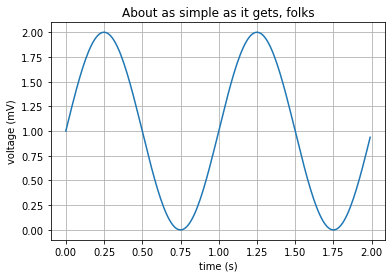

In [9]:
import matplotlib as mpl

mpl.use('Agg')
# mpl.use('Agg') if you are on a headless machine

import matplotlib.pyplot as plt
import numpy as np
from comet_ml import Experiment

experiment = Experiment(api_key="52SXTo5QB2MuGvJRWzgY8PJHx",
    project_name="cancer",
    workspace="s-hossain18",log_code=True)

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)

experiment.log_figure(figure=plt)
experiment.end()